In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pathlib

In [4]:
!pip install git+https://github.com/tensorflow/docs


import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers


import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-67xyb64h
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-67xyb64h
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0a610a0dfdbc3aa8b6ede00aa698b20ede1bfbc6a_-cp36-none-any.whl size=124951 sha256=ee6563c084be806c47e2f93ef3c77b6d0c583ca25352a51eac15dfb839289c5c
  Stored in directory: /tmp/pip-ephem-wheel-cache-juqrkgz8/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [5]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path


32768/30286 [================================] - 0s 4us/step


'/root/.keras/datasets/auto-mpg.data'

In [6]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(dataset_path, names=column_names, na_values= "?", sep=' ', comment="\t", skipinitialspace=True)

dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [7]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
dataset=dataset.dropna()

In [9]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
dataset['Origin'] = dataset['Origin'].map({1:'Usa', 2: 'Europe', 3: 'Japan'})


In [11]:
dataset['Origin'].unique()

array(['Usa', 'Japan', 'Europe'], dtype=object)

In [12]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep= '')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,Usa
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [13]:
train_data = dataset.sample(frac=0.8, random_state=0)
test_data = dataset.drop(train_data.index)

In [14]:
train_data[0:5]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,Usa
146,28.0,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,22.3,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,12.0,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,33.8,4,97.0,67.0,2145.0,18.0,80,0,1,0


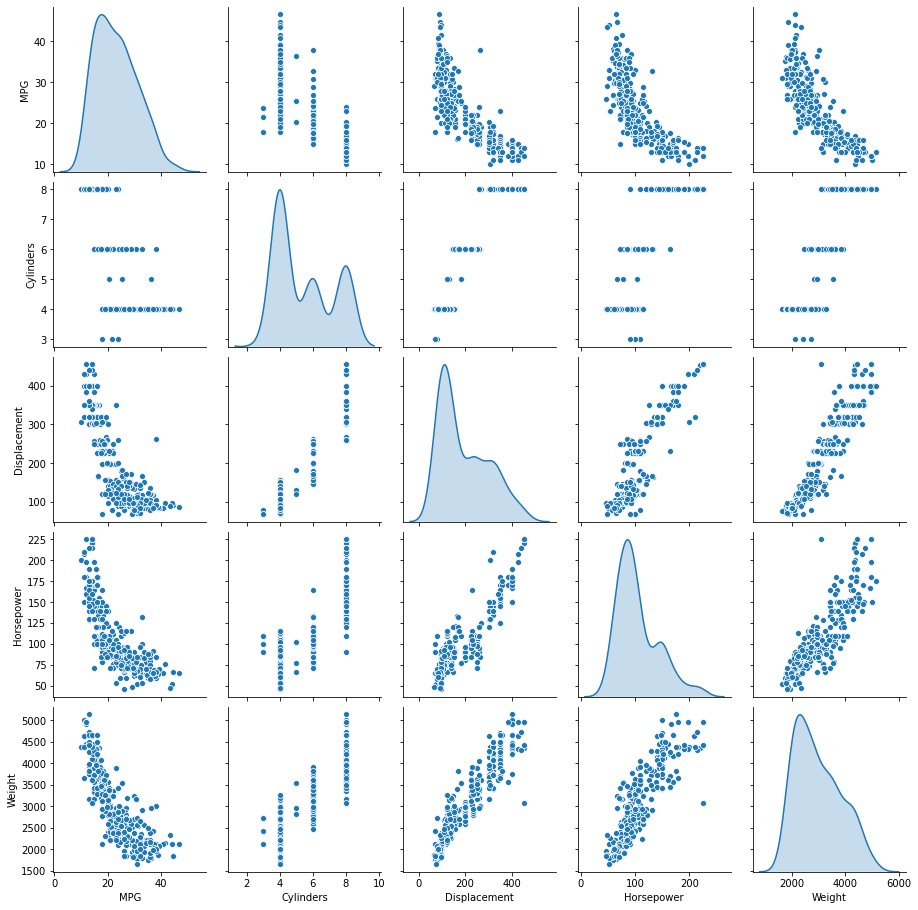

In [15]:
sns.pairplot(train_data[['MPG', 'Cylinders','Displacement','Horsepower','Weight',]],diag_kind="kde")

In [16]:
train_data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,Usa
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [17]:
train_labels = train_data.pop("MPG")
test_label = test_data.pop('MPG')

In [18]:
def nor(x):
  return ( (x - train_data.mean()) / train_data.std() )

n_train_data = nor(train_data)
n_test_data = nor(test_data)


In [19]:
n_train_data[0:5]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,Usa
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,-0.465148,-0.495225,0.774676
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,-0.465148,-0.495225,0.774676
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,-0.465148,-0.495225,0.774676
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,-0.465148,-0.495225,0.774676
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-0.465148,2.012852,-1.286751


In [20]:
a = len(train_data.keys())
a

9

In [21]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [22]:
model = build_model()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [24]:
e_batch = n_train_data[:10]
e_result = model.predict(e_batch)
e_result

array([[0.15645456],
       [0.08901113],
       [0.33500168],
       [0.06948382],
       [0.12820297],
       [0.04724179],
       [0.11397359],
       [0.1479303 ],
       [0.09044296],
       [0.24867588]], dtype=float32)

In [26]:
history = model.fit(n_train_data, train_labels, epochs=1000, validation_split=0.2,callbacks=[tfdocs.modeling.EpochDots()])

Epoch 1/1000
1/8 [==>...........................] - ETA: 0s - loss: 603.9543 - mae: 23.3115 - mse: 603.9543
Epoch: 0, loss:561.5652,  mae:22.3913,  mse:561.5652,  val_loss:551.9498,  val_mae:22.1272,  val_mse:551.9498,  
8/8 [==============================] - 0s 30ms/step - loss: 561.5652 - mae: 22.3913 - mse: 561.5652 - val_loss: 551.9498 - val_mae: 22.1272 - val_mse: 551.9498
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 507.1745 - mae: 21.1426 - mse: 507.1745 - val_loss: 496.7909 - val_mae: 20.8376 - val_mse: 496.7909
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 452.7851 - mae: 19.8387 - mse: 452.7851 - val_loss: 437.2274 - val_mae: 19.3652 - val_mse: 437.2274
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 394.2617 - mae: 18.3159 - mse: 394.2617 - val_loss: 373.1225 - val_mae: 17.6290 - val_mse: 373.1225
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 331.7791 - mae: 16.5596 - mse: 

In [30]:
hist = pd.DataFrame(history.history)
hist[-1:]

,loss,mae,mse,val_loss,val_mae,val_mse
999,2.562133,1.020475,2.562133,10.387861,2.410752,10.387861


In [31]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE[MPG]')

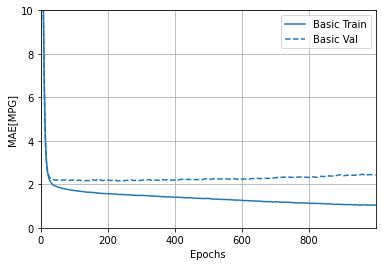

In [33]:
plotter.plot({'Basic':history }, metric='mae')
plt.ylim([0,10])
plt.ylabel('MAE[MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

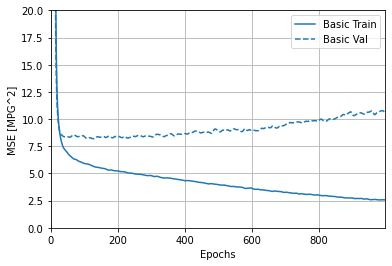

In [34]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [37]:
model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience =10)
early_history = model.fit(n_train_data, train_labels, epochs=1000, validation_split=0.2,verbose=2, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch 1/1000

Epoch: 0, loss:540.4252,  mae:21.9886,  mse:540.4252,  val_loss:518.6469,  val_mae:21.4286,  val_mse:518.6469,  
.8/8 - 0s - loss: 540.4252 - mae: 21.9886 - mse: 540.4252 - val_loss: 518.6469 - val_mae: 21.4286 - val_mse: 518.6469
Epoch 2/1000
.8/8 - 0s - loss: 470.6061 - mae: 20.3223 - mse: 470.6061 - val_loss: 445.1746 - val_mae: 19.6243 - val_mse: 445.1746
Epoch 3/1000
.8/8 - 0s - loss: 401.1351 - mae: 18.5519 - mse: 401.1351 - val_loss: 367.9166 - val_mae: 17.5685 - val_mse: 367.9166
Epoch 4/1000
.8/8 - 0s - loss: 331.4111 - mae: 16.5671 - mse: 331.4111 - val_loss: 294.9946 - val_mae: 15.4124 - val_mse: 294.9946
Epoch 5/1000
.8/8 - 0s - loss: 265.6447 - mae: 14.5835 - mse: 265.6447 - val_loss: 227.0236 - val_mae: 13.2866 - val_mse: 227.0236
Epoch 6/1000
.8/8 - 0s - loss: 204.0401 - mae: 12.5802 - mse: 204.0401 - val_loss: 165.0762 - val_mae: 11.2226 - val_mse: 165.0762
Epoch 7/1000
.8/8 - 0s - loss: 150.0937 - mae: 10.5350 - mse: 150.0937 - val_loss: 116.4652 - val_ma

Text(0, 0.5, 'MAE [MPG]')

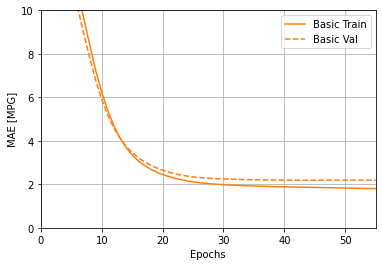

In [38]:
plotter.plot({'basic': early_history}, metric='mae')
plt.ylim(0,10)
plt.ylabel('MAE [MPG]')

In [40]:
loss, mae, mse = model.evaluate(n_test_data, test_label)

3/3 [==============================] - 0s 3ms/step - loss: 6.1958 - mae: 1.9762 - mse: 6.1958


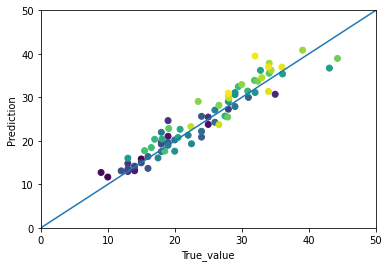

In [61]:
prediction = model.predict(n_test_data).flatten()


t = np.arange(78)
plt.scatter(test_label, prediction, c=t)
plt.xlabel('True_value')
plt.ylabel('Prediction')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

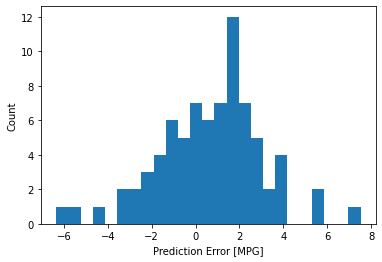

In [65]:
error = prediction - test_label
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")
